<a href="https://colab.research.google.com/github/nursenakok/hugging-face-beginner-guide/blob/main/Attention_Mechanism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Required Libraries
!pip install transformers torch matplotlib seaborn

In [2]:
# Import Libraries
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from transformers import AutoModel, AutoTokenizer

In [3]:
# Load Model and Tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_attentions = True) # Get attention weights

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [4]:
# Prepare Example Text and Tokenize
text = "The cat sat on the mat"
input = tokenizer(text, return_tensors = "pt")
tokens = tokenizer.convert_ids_to_tokens(input['input_ids'][0])

In [5]:
print(f"Tokens: {tokens}")
print(f"Input shape: {input['input_ids'].shape}") # batch_size = 1 & sequence_length = 8

Tokens: ['[CLS]', 'the', 'cat', 'sat', 'on', 'the', 'mat', '[SEP]']
Input shape: torch.Size([1, 8])


In [6]:
# Get Attention Weights from Model

model.eval()  # Set model to evaluation mode and run inference
with torch.no_grad():
    outputs = model(**input)

attentions = outputs.attentions # Extract attention weights (12 layers, 12 heads each)
print(f"Total layers: {len(attentions)}")
print(f"Heads per layer: {attentions[0].shape[1]}")


Total layers: 12
Heads per layer: 12


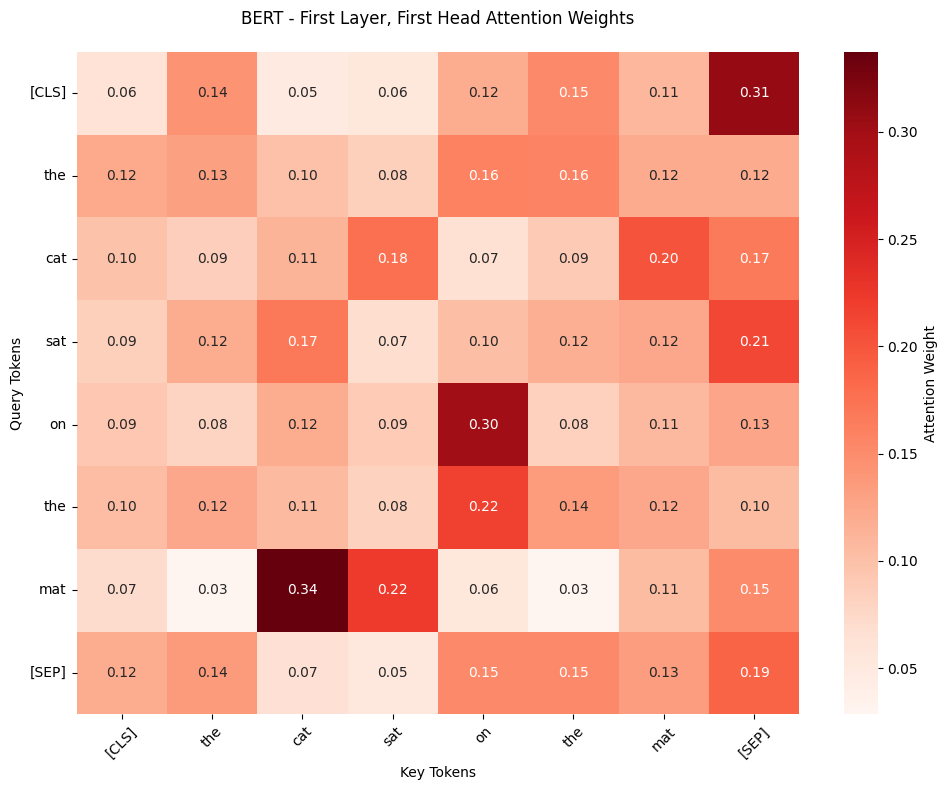

In [7]:
# Visualize Attention Heatmap (First Layer, First Head)
# Get attention weights from first layer, first head
attention_weights = attentions[0][0, 0].detach().numpy()  # Shape: (seq_len, seq_len)

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(attention_weights,
            xticklabels=tokens,
            yticklabels=tokens,
            cmap="Reds",
            annot=True,
            fmt=".2f",
            cbar_kws={'label': 'Attention Weight'})

plt.title("BERT - First Layer, First Head Attention Weights", fontsize=12, pad=20)
plt.xlabel("Key Tokens")
plt.ylabel("Query Tokens")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


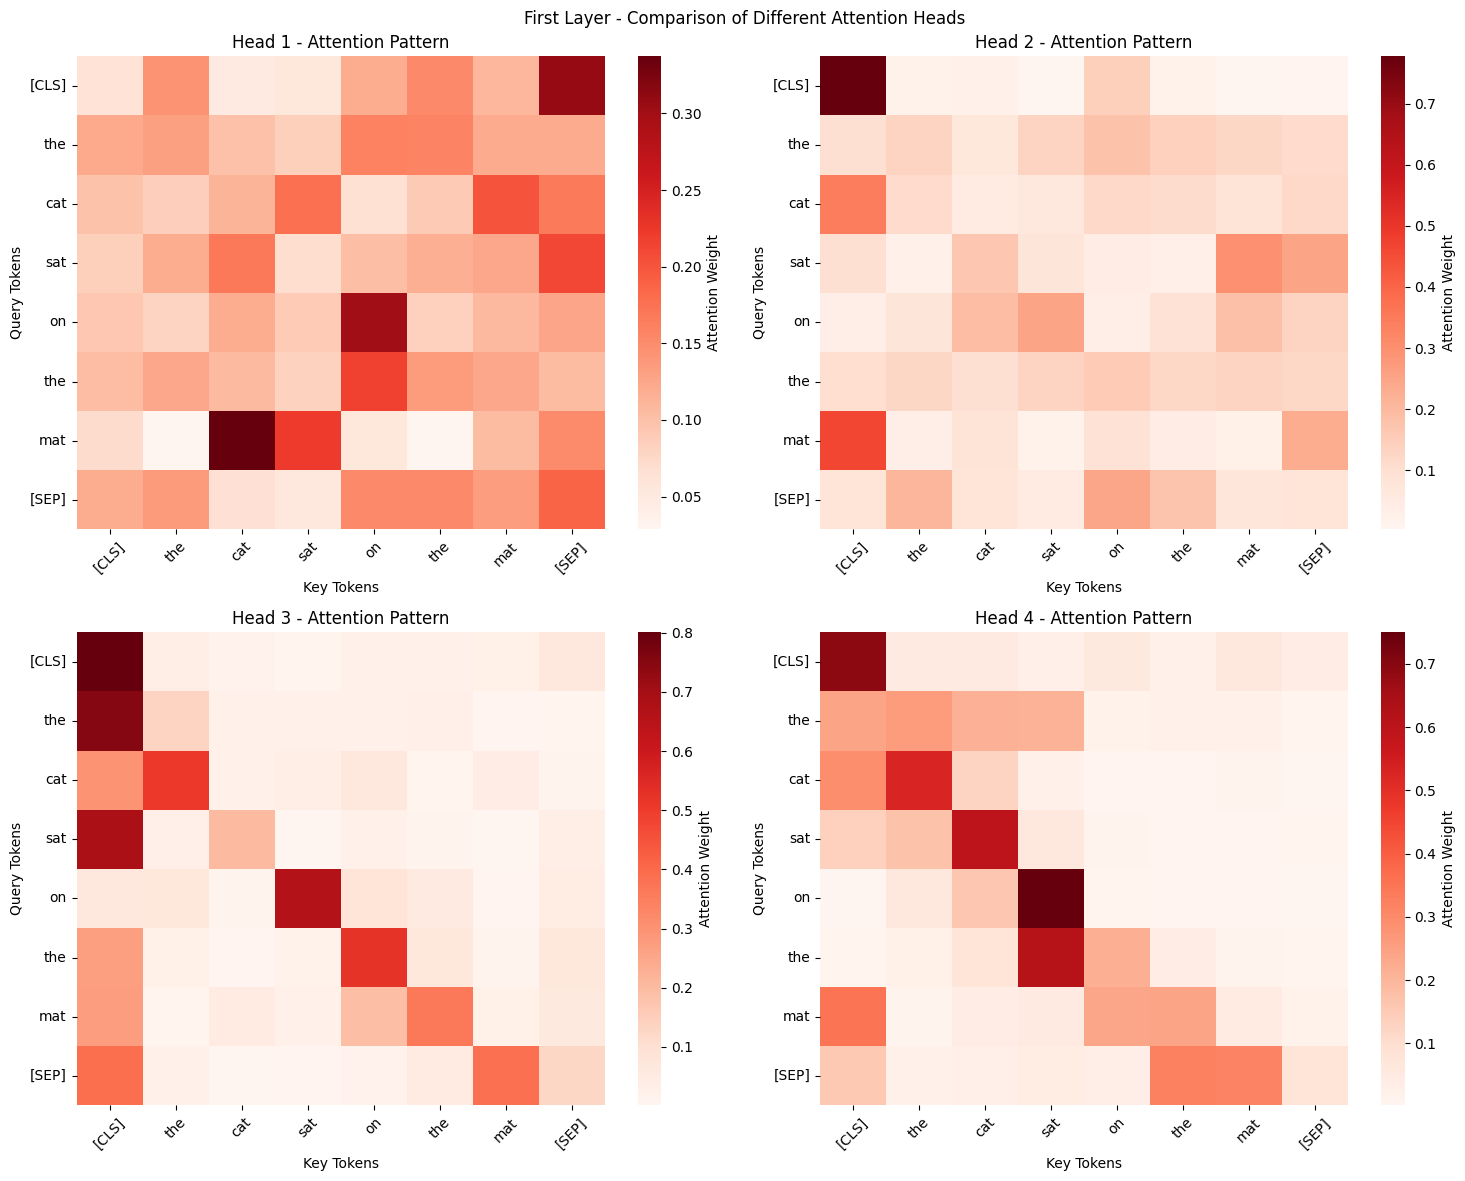

In [8]:
# Compare Different Attention Heads in First Layer (in same layer)
# Visualize first 4 heads of the first layer
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i in range(4):
    attention_weights = attentions[0][0, i].detach().numpy()

    sns.heatmap(attention_weights,
                xticklabels=tokens,
                yticklabels=tokens,
                cmap="Reds",
                ax=axes[i],
                cbar_kws={'label': 'Attention Weight'})

    axes[i].set_title(f'Head {i+1} - Attention Pattern', fontsize=12)
    axes[i].set_xlabel("Key Tokens")
    axes[i].set_ylabel("Query Tokens")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].tick_params(axis='y', rotation=0)

plt.suptitle("First Layer - Comparison of Different Attention Heads", fontsize=12)
plt.tight_layout()
plt.show()

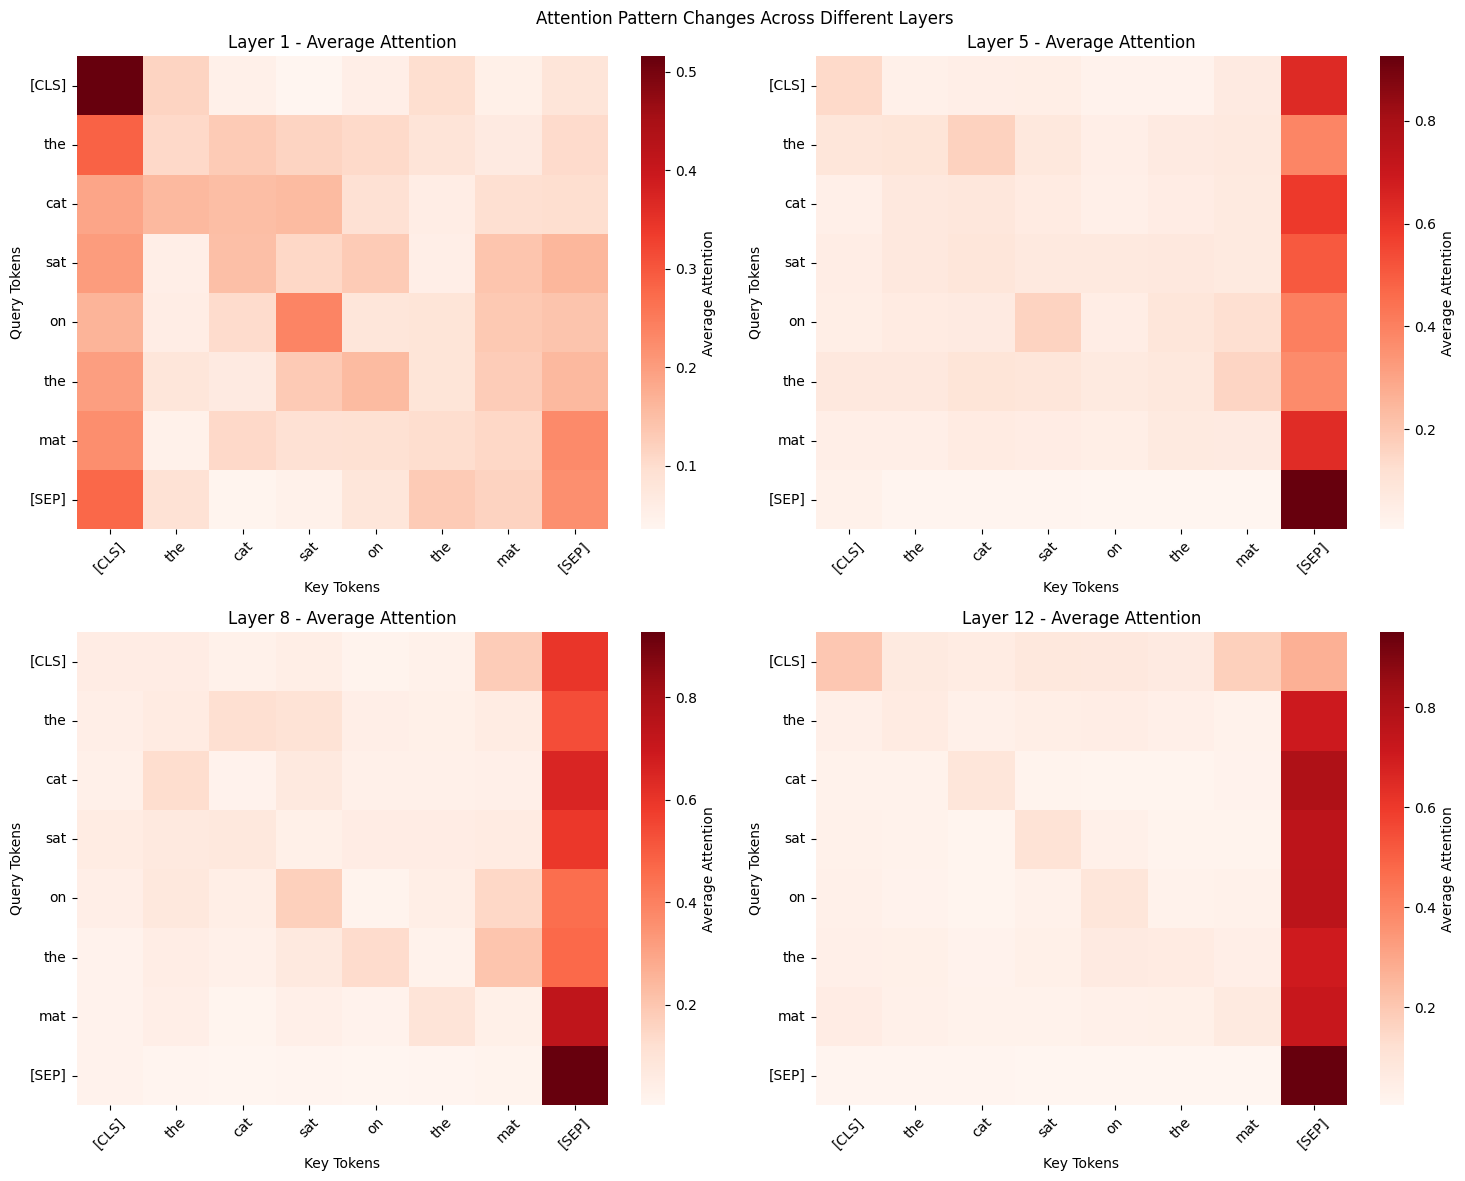

In [9]:
# Analyze Attention Patterns Across Different Layers
layer_avg_attention = []

for layer_idx, layer_attention in enumerate(attentions):
    # Average across all heads in the layer
    avg_attention = layer_attention.mean(dim=1)[0].detach().numpy()
    layer_avg_attention.append(avg_attention)

# Visualize first, middle, and last layers
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

layer_indices = [0, 4, 7, 11]  # First, middle, and last layers

for idx, layer_idx in enumerate(layer_indices):
    sns.heatmap(layer_avg_attention[layer_idx],
                xticklabels=tokens,
                yticklabels=tokens,
                cmap="Reds",
                ax=axes[idx],
                cbar_kws={'label': 'Average Attention'})

    axes[idx].set_title(f'Layer {layer_idx + 1} - Average Attention', fontsize=12)
    axes[idx].set_xlabel("Key Tokens")
    axes[idx].set_ylabel("Query Tokens")
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].tick_params(axis='y', rotation=0)

plt.suptitle("Attention Pattern Changes Across Different Layers", fontsize=12)
plt.tight_layout()
plt.show()